In [34]:
from heapq import heappush, heappop, heapify  
from math import radians, cos, sin, asin, sqrt 

class MinHeap: 
      
    # Constructor to initialize a heap 
    def __init__(self): 
        self.heap = []  
  
    def parent(self, i): 
        return (i-1)//2
      
    # Inserts a new key 'k' 
    def insertKey(self, k): 
        heappush(self.heap, k)            
  
    # Decrease value of key at index 'i' to new_val 
    # It is assumed that new_val is smaller than heap[i] 
    def decreaseKey(self, i, new_val): 
        self.heap[i][0] = new_val
        #print(self.heap[self.parent(i)][0])
        while(i != 0 and self.heap[self.parent(i)][0] > self.heap[i][0]): 
            # Swap heap[i] with heap[parent(i)] 
            self.heap[i][0] , self.heap[self.parent(i)][0] = self.heap[self.parent(i)][0], self.heap[i][0]
            self.heap[i][1] , self.heap[self.parent(i)][1] = self.heap[self.parent(i)][1], self.heap[i][1]
              
    # Method to remove minium element from min heap 
    def extractMin(self): 
        return heappop(self.heap) 
  
    # This functon deletes key at index i. It first reduces 
    # value to minus infinite and then calls extractMin() 
    def deleteKey(self, i): 
        self.decreaseKey(i, float("-inf")) 
        self.extractMin() 
  
    # Get the minimum element from the heap 
    def getMin(self): 
        return self.heap[0] 

In [35]:
from typing import Tuple, Optional

def dijkstra(adj_list: dict, start_vertex: int, weights: Optional[dict] = None) -> Tuple[dict]:
    counter = 0
    curr_num = 0
    dist = {}
    preds = {}
    heap = MinHeap()
    if weights == None:
        weights = {}
        no_weights = True
    else:
        no_weights = False
    for key in adj_list.keys():
        if key == start_vertex:
            dist[key] = 0
            preds[key] = None
        else:
            dist[key] = float("inf")
            preds[key] = None
        if no_weights:
            weights[key] = 1
        heap.insertKey([dist[key], key])
    while len(heap.heap):
        distance, vertex_id = heap.extractMin()
        if distance > dist[vertex_id]:
            continue
        neighs = adj_list[vertex_id]
        for neigh in neighs.keys():
            edge_dist = adj_list[vertex_id][neigh][0]['length'] * weights[neigh]
            if edge_dist + distance < dist[neigh]:
                dist[neigh] = edge_dist + distance
                preds[neigh] = vertex_id
                heap.insertKey([edge_dist + distance, neigh])
    return (dist, preds)
        
        
    
        
    

In [36]:
def nearest_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    for obj in list1:
        distances, _ = dijkstra(adj_list, obj, weights)
        min_ = float('inf')
        min_id = -1
        for obj2 in list2:
            if distances[obj2] < min_:
                min_id = obj2
                min_ = distances[obj2]
        nearest[obj] = (min_, min_id)
    return nearest


def nearest_fwd_bwd_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    distances_fwd = {}
    distances_bwd = {}
    for obj in list1:
        distances_fwd[obj], _ = dijkstra(adj_list, obj, weights)
    for obj in list2:
        distances_bwd[obj], _ = dijkstra(adj_list, obj, weights)

    for obj in list1:
        min_ = float("inf")
        min_id = -1
        for obj2 in list2:
            if distances_fwd[obj][obj2] + distances_bwd[obj2][obj] < min_:
                min_ = distances_fwd[obj][obj2] + distances_bwd[obj2][obj]
                min_id = obj2
        nearest[obj] = (min_, min_id)
    return nearest

def nearest_bwd_list_for_list(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> dict:
    nearest = {}
    distances_bwd = {}
    for obj in list2:
        distances_bwd[obj], _ = dijkstra(adj_list, obj, weights)

    for obj in list1:
        min_ = float("inf")
        min_id = -1
        for obj2 in list2:
            if distances_bwd[obj2][obj] < min_:
                min_ = distances_bwd[obj2][obj]
                min_id = obj2
        nearest[obj] = (min_, min_id)
    return nearest

def distances_fwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    preds = {}
    for obj in list1:
        distances[obj], preds[obj] = dijkstra(adj_list, obj, weights)
    return (distances, preds)

def distances_bwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    preds = {}
    for obj2 in list2:
        dist, pred = dijkstra(adj_list, obj2, weights)
        for obj in list1:
            if obj not in distances:
                distances[obj], preds[obj] = {obj2: dist[obj]}, pred
            else:
                distances[obj].update({obj2: dist[obj]})
    return (distances, preds) 

def distances_fwd_bwd(adj_list: dict, list1: list, list2: list, weights: Optional[dict] = None) -> Tuple[dict]:
    distances = {}
    distances_fwd = {}
    distances_bwd = {}
    preds_fwd = {}
    preds_bwd = {}
    preds = {}
    for obj in list1:
        distances_fwd[obj], preds_fwd[obj] = dijkstra(adj_list, obj, weights)
    for obj in list2:
        distances_bwd[obj], preds_bwd[obj] = dijkstra(adj_list, obj, weights)
    
    for obj in list1:
        for obj2 in list2:
            if obj not in distances:
                distances[obj], preds[obj] = {obj2: distances_fwd[obj][obj2] + distances_bwd[obj2][obj]}, {'fwd': preds_fwd[obj],
                                                                                                           'bwd': preds_bwd[obj2]}
            else:
                distances[obj].update({obj2: distances_fwd[obj][obj2] + distances_bwd[obj2][obj]})
    return (distances, preds)

In [37]:
adj_list = {1:{2:{0: {'length': 5}}}, 2:{1:{0: {'length': 3}}}}
distances_fwd(adj_list, [1], [2])

({1: {1: 0, 2: 5}}, {1: {1: None, 2: 1}})

In [38]:
import xml.etree.ElementTree as ET
root = ET.parse('./Ekb.osm').getroot()
nodes = root.findall('./node')
ways = root.findall('./way')

In [40]:
import networkx as nx
import osmnx as ox
from functools import partial
import xml.etree.ElementTree as ET
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

class MetricsCalculator():
    
    def __init__(self, path_to_osm: str) -> None:
        self.graph = ox.core.graph_from_file(path_to_osm, simplify=False, retain_all=True)
        self.objs = []
        self.root = ET.parse(path_to_osm).getroot()
        self.weights = {}
        self.nodes = []
        self.inf_objs = []
        for obj in self.inf_objs:
            self.weights[obj] = random.random() + 1
        for obj in self.graph.adj.keys():
            if obj not in self.weights:
                self.weights[obj] = 1
        
        self.func_dict_nearest = {
                                  "fwd_node": partial(nearest_list_for_list, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                  "fwd_inf": partial(nearest_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                  "fwd_bwd_node": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                  "fwd_bwd_inf": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                  "bwd_node": partial(nearest_bwd_list_for_list, self.graph.adj,  self.objs, self.inf_objs, self.weights),
                                  "bwd_inf": partial(nearest_fwd_bwd_list_for_list, self.graph.adj, self.inf_objs, self.objs, self.weights)
                                 }
        self.func_dict_distances = {
                                    "fwd_node": partial(distances_fwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "fwd_inf": partial(distances_fwd, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                    "bwd_node": partial(distances_bwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "bwd_inf": partial(distances_bwd, self.graph.adj, self.inf_objs, self.objs, self.weights),
                                    "fwd_bwd_node": partial(distances_fwd_bwd, self.graph.adj, self.objs, self.inf_objs, self.weights),
                                    "fwd_bwd_inf": partial(distances_fwd_bwd, self.graph.adj, self.inf_objs, self.objs, self.weights)
                                    }
        
    def crop_and_save_graph(self):
        fig, ax = ox.plot_graph(self.graph, save=True, show=False, filename='Ekb_graph', file_format='png', 
                                node_alpha=0, edge_color='b', edge_linewidth=0.7)
        ox.core.remove_isolated_nodes(self.graph)
        removing_nodes = []
        for i in self.graph.nodes:
            node = self.graph.nodes[i]
            if node['x'] < 60.46 or node['x'] > 60.87 or node['y'] < 56.737 or node['y'] > 56.915:
                removing_nodes.append(i)
        self.graph.remove_nodes_from(removing_nodes)
        
        removing_nodes = []      
        distances, preds = distances_fwd(self.graph.adj, [4355578113], self.nodes, self.weights)
        dists = distances[4355578113]
        for i in dists:
            if dists[i] == float('inf'):
                removing_nodes.append(i)
        
        self.graph.remove_nodes_from(removing_nodes)
        self.update_nodes_list()
        fig, ax = ox.plot_graph(self.graph, save=True, show=False, filename='Ekb_graph_cropped', 
                                file_format='png', node_alpha=0, edge_color='b', edge_linewidth=0.7, dpi=200)
       
    
    def set_inf_objs(self, objs):
        min_dists = [float("inf") for _ in range(len(objs))]
        self.inf_objs = [0 for _ in range(len(objs))]
        for i in self.nodes:
            phi1 = self.graph.nodes[i]['y']
            l1 = self.graph.nodes[i]['x']
            for j in range(len(objs)):
                phi2 = objs[j]['y']
                l2 = objs[j]['x']
                cos = math.sin(phi1) * math.sin(phi2) + math.cos(phi1) * math.cos(phi2) * math.cos(l1 - l2)
                dist = math.acos(cos) * 6371
                if dist < min_dists[j]:
                    min_dists[j] = dist
                    self.inf_objs[j] = i
        inf_objs_set = set(self.inf_objs)
        self.objs = list(filter(lambda x: x not in inf_objs_set, self.nodes))
        
        
    def update_nodes_list(self):
        self.nodes = list(self.graph.nodes.keys())
        
                
    def nearest(self, mode: str, start: str) -> dict:
        return self.func_dict_nearest[mode + "_" + start]()
    
    
    def closer_than_x(self, distance: int, mode: str, start: str) -> dict:
        closer_than_x = {}
        distances, _ = self.func_dict_distances[mode + "_" + start]()
        if start == "node":
            tmp = {'from': self.objs,
                   'to': self.inf_objs}
        elif start == "inf":
            tmp = {'from': self.inf_objs,
                   'to': self.objs}
            
        for obj in tmp['from']:
            for obj2 in tmp['to']:
                if distances[obj][obj2] <= distance * 1000:
                    if obj not in closer_than_x:
                        closer_than_x[obj] = [obj2]
                    else:
                        closer_than_x[obj].append(obj2)

        return closer_than_x
    
    
    def min_furthest_for_inf(self, mode: str) -> tuple:
        distances, _ = self.func_dict_distances[mode + "_" + "inf"]()
        min_ = float("inf")
        min_id = -1
        for obj in self.inf_objs:
            if min_ > max([(distances[obj][obj2], obj) for obj2 in self.objs])[0]:
                min_, min_id = max([(distances[obj][obj2], obj) for obj2 in self.objs])
        return (min_, min_id)


    def closest_inf_in_summary(self, mode: str, start: str) -> tuple:
        distances, _ = self.func_dict_distances["fwd_inf"]()
        min_ = float("inf")
        min_id = -1
        for obj in self.inf_objs:
            dist = 0
            for obj2 in self.objs:
                dist += distances[obj][obj2]
            if dist < min_:
                min_ = dist
                min_id = obj
        return (min_, min_id)
    
    
    
#     def min_weight_tree(self) -> tuple:
#         distances, preds = self.func_dict_distances['fwd_inf']()
#         min_ = float("inf")
#         min_id = -1
#         for obj in self.inf_objs:
#             edges = set()
#             sum_ = 0
#             for obj2 in self.objs:
#                 pred = preds[obj]
#                 curr = obj2
#                 while curr != obj:
#                     if (curr, pred[curr]) not in edges:
#                         edges.add((curr, pred[curr]))
#                         sum_ += (distances[obj][curr] - distances[obj][pred[curr]])
#                     curr = pred[curr]
#             if sum_ < min_:
#                 min_ = sum_
#                 min_id = obj
#         for obj in self.objs:
#             print(distances[min_id][obj])
#         return (min_, min_id)
            
        
    def list_to_obj_tree(self, objs, start_obj, filename, skip_inf_dists=False, write=True):
        distances, preds = distances_fwd(self.graph.adj, [start_obj], objs, self.weights)
        edges = set()
        sum_ = 0
        routes_list = []
        tree_dict = {}
        for obj in objs:
            if distances[start_obj][obj] == float('inf'):
                if skip_inf_dists:
                    return 'no tree'
                else:
                    print('no way to ' + str(obj))
                    continue
            pred = preds[start_obj]
            curr = obj
            path_list = [curr]
            path_len = 0
            while curr != start_obj:
                path_list.append(pred[curr])
                if (curr, pred[curr]) not in edges:
                    edges.add((curr, pred[curr]))
                    
                    if pred[curr] not in tree_dict:
                        tree_dict[pred[curr]] = [curr]
                    else:
                        tree_dict[pred[curr]].append(curr)
    
                    sum_ += (distances[start_obj][curr] - distances[start_obj][pred[curr]])
                    path_len += distances[start_obj][curr] - distances[start_obj][pred[curr]]
                curr = pred[curr]
            routes_list.append(list(reversed(path_list)))
            
        if write:
            with open(filename, 'w') as f:
                csv_writer = csv.writer(f, delimiter='\t')
                csv_writer.writerow(['Vertex', 'Adjacent vertexes'])
                for vertex in tree_dict.keys():
                    csv_writer.writerow([str(vertex), ','.join(str(idx) for idx in tree_dict[vertex])])
                    
        return (sum_, routes_list)

    
    def write_csv(self, filename, rows):
        csv_file = open(os.path.join('./csv', filename), 'w')
        wr = csv.writer(csv_file, quoting=csv.QUOTE_MINIMAL, dialect='excel', lineterminator='\n')
        for row in rows:
            wr.writerow(row)
    
    
    def objs_into_clusters(self, k, filename: str = 'csv/clusters.csv', write: bool = False):
        objs = self.chosen_objs
        if k > len(objs):
            return
        clusters = []
        dists_dict = {}
        
        for i in range(len(objs)):
            clusters.append([i])
            dists_dict[i] = {}
            
        for i in range(len(objs)):
            phi1 = self.graph.nodes[objs[i]]['y']
            l1 = self.graph.nodes[objs[i]]['x']
            for j in range(i + 1, len(objs)):
                phi2 = self.graph.nodes[objs[j]]['y']
                l2 = self.graph.nodes[objs[j]]['x']
                cos = math.sin(phi1) * math.sin(phi2) + math.cos(phi1) * math.cos(phi2) * math.cos(l1 - l2)
                dist = math.acos(cos) * 6371
                dists_dict[i][j] = dists_dict[j][i] = dist
        history = [clusters]
        
        while len(clusters) > k:
            min_ = float('inf')
            min_start = -1
            min_end = -1
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    max_ = -1
                    max_start = -1
                    max_end = -1
                    for ind1 in clusters[i]:
                        for ind2 in clusters[j]:
                            if dists_dict[ind1][ind2] != float('inf') and dists_dict[ind1][ind2] > max_:
                                max_ = dists_dict[ind1][ind2]
                                max_start = i
                                max_end = j
                    if max_ < min_:
                        min_ = max_
                        min_start = max_start
                        min_end = max_end
            new_clusters = []
            for i in range(len(clusters)):
                if i == min_start:
                    new_clusters.append(clusters[i] + clusters[min_end])
                    continue
                if i == min_end:
                    continue
                new_clusters.append(clusters[i])
            clusters = new_clusters
            history.append(clusters)
            
        if write:
            rows = [('', 'Cluster №', 'nodes')]
            for i in range(len(history) - 1, 0, -1):
                rows.append(('{} clusters'.format(len(history[i])), 'info'))
                for j in range(len(history[i])):
                    rows.append(('', str(j + 1), ','.join(str(node) for node in history[i][j])))
            self.write_csv('clusters.csv', rows)
            
        return (clusters, history)
    
    
    def dendrogram(self, clusters, history):
        objs = self.chosen_objs
        fig, ax = plt.subplots()
        dict_ = {}
        for i in range(len(clusters[0])):
            dict_[clusters[0][i]] = i
        for i in range(1, len(history)):
            for key in dict_:
                ax.plot([dict_[key], dict_[key]], [i - 1, i], 'b')
            for j in range(len(history[i])):
                if len(history[i][j]) != len(history[i - 1][j]):
                    x1 = dict_[history[i][j][0]]
                    x2 = dict_[history[i][j][len(history[i][j]) - 1]]
                    ax.plot([x1, x2], [i, i], 'b')
                    new_ind = (x1 + x2) / 2
                    for elem in history[i][j]:
                        dict_[elem] = new_ind
                    break
        plt.xlabel(', '.join(str(s) for s in history[-1][0]))
        fig.savefig('images/dendrogram.png')
        
    
    def work_with_centroids(self, clusters, write: bool = False):
        inf_obj = self.chosen_inf_obj
        objs = self.chosen_objs
        obj_centroids = []
        centroid_trees = []
        all_routes = []
        centroid_nodes = []
        number = 1
        for cluster in clusters:
            center_y = np.sum([self.graph.nodes[objs[i]]['y'] for i in cluster]) / len(cluster)
            center_x = np.sum([self.graph.nodes[objs[i]]['x'] for i in cluster]) / len(cluster)
            
            min_dist = float('inf')
            centr_obj_id = -1
            for id_ in self.nodes:
                try:
                    y = self.graph.nodes[id_]['y']
                    x = self.graph.nodes[id_]['x']
                    cos = math.sin(y) * math.sin(center_y) + math.cos(y) * math.cos(center_y) * math.cos(x - center_x)
                    dist = math.acos(cos) * 6371
                    if dist < min_dist:
                        min_dist = dist
                        centr_obj_id = id_
                except:
                    continue
            obj_centroids.append(centr_obj_id)
            cluster_objs = [objs[i] for i in cluster]
            weight, routes_list = self.list_to_obj_tree(cluster_objs, centr_obj_id,
                                                        filename='./csv/cluster_tree_number_{}.csv'.format(number))
            all_routes += routes_list
            centroid_nodes.append(self.graph.nodes[centr_obj_id])
            number += 1
    
        name = str(len(clusters)) + '_clusters_trees'
        self.save_tree_plot(all_routes, centroid_nodes, name, mode='centroids')
        
        name = str(len(clusters)) + '_centroids_tree'
        sum_, routes = self.list_to_obj_tree(obj_centroids, inf_obj, './csv/'+name+'.csv')
        self.centroids = obj_centroids
        self.save_tree_plot(routes, [self.graph.nodes[inf_obj]], name, mode='centroids')
        
        
    def save_tree_plot(self, routes_list, blue_nodes, name, mode='objs'):
        fig, ax = ox.plot.plot_graph_routes(self.graph, routes_list, show=False, close=False, node_alpha=0, 
                                            edge_color='lightgray', edge_alpha=1, edge_linewidth=0.8, 
                                            route_color='#00cc66', route_linewidth=0.8, route_alpha=1, 
                                            orig_dest_node_size=10, orig_dest_node_color='r', orig_dest_node_alpha=1)
        for node in blue_nodes:
            ax.scatter(node['x'], node['y'], c='#0000ff', s=10, zorder=10)
            
        for i in range(len(routes_list)):
            node = self.graph.nodes[routes_list[i][-1]]
            text = ''
            try:
                text = str(self.chosen_objs.index(node['osmid']))
            except:
                text = str(i + 1)
            ax.annotate(xy=(node['x'], node['y']), s=text, size=4, xytext=(node['x'] + 0.0025, node['y']))
        ox.plot.save_and_show(fig, ax, save=True, show=False, filename=name, 
                              file_format='png', close=True, dpi=200, axis_off=True)
        
        
    def save_adjacency_matrix(self, filename: str):
        self.df = nx.to_pandas_adjacency(self.graph, dtype=np.uint8)
        self.df.to_csv(filename)
        
        
    def save_adjacency_list(self, filename: str):
        with open(filename, 'w') as f:
            writer = csv.writer(f, delimiter = '\t')
            writer.writerow(['Vertex', 'Adjacent vertexes'])
            for vertex in self.graph.adj.keys():
                writer.writerow([str(vertex), ','.join(str(vert) for vert in self.graph.adj[vertex])])
                
                
    def save_chosen_objs_to_csv(self):
        inf_obj = self.chosen_inf_obj
        csv_file = open(os.path.join('./csv', 'chosen_objs.csv'), 'w')
        wr = csv.writer(csv_file, quoting=csv.QUOTE_MINIMAL, dialect='excel', lineterminator='\n')
        wr.writerow(('num', 'id', 'x', 'y', 'is_inf'))
        wr.writerow((-1, inf_obj, self.graph.nodes[inf_obj]['x'], self.graph.nodes[inf_obj]['y'], True))
        for i in range(len(self.chosen_objs)):
            node = self.graph.nodes[self.chosen_objs[i]]
            wr.writerow((i, self.chosen_objs[i], node['x'], node['y'], False))
        

In [41]:
import json

m = MetricsCalculator('./Ekb.osm')
m.crop_and_save_graph()

inf_objs_coords = []
hospitals = 0
fire_departments = 0
shops = 0
with open('inf_objs.json') as f:
    json_objs = json.load(f)
    hospitals = len(json_objs["hospitals"])
    fire_departments = len(json_objs["fire_departments"])
    shops = len(json_objs["shops"])
    for name in json_objs:
        inf_objs_coords += json_objs[name]
        
m.set_inf_objs(inf_objs_coords)

In [26]:
# m.save_adjacency_matrix('./csv/adjacency_matrix.csv')
# m.save_adjacency_list('./csv/adjacency_list.csv')
# len(m.graph.nodes)

26415

In [46]:
# карта с инфраструктурными объектами, можно не перерисовывать

# from matplotlib.lines import Line2D

# fig, ax = ox.plot_graph(m.graph, save=False, show=False, node_alpha=0, edge_color='lightgray', edge_linewidth=0.7)
# for i in range(len(m.inf_objs)):
#     color = 'k'
#     if i < hospitals:
#         color = 'g'
#     elif i < hospitals + fire_departments:
#         color = 'r'
#     else:
#         color = 'b'
#     node = m.graph.nodes[m.inf_objs[i]]
#     ax.scatter(node['x'], node['y'], c=color, s=7, zorder=10)
#     ax.annotate(xy=(node['x'], node['y']), s=str(i), size=4, xytext=(node['x'] + 0.0025, node['y']))
    
# legend_elems = [Line2D([0], [0], marker='o', color='w', label='hospital',
#                           markerfacecolor='g', markersize=7),
#                 Line2D([0], [0], marker='o', color='w', label='fire department',
#                           markerfacecolor='r', markersize=7),
#                 Line2D([0], [0], marker='o', color='w', label='shop',
#                           markerfacecolor='b', markersize=7)]
# ax.legend(handles=legend_elems, loc='lower left', fontsize= 'x-small')
# ox.plot.save_and_show(fig, ax, save=True, show=False, filename='inf_objs', file_format='png', 
#                       close=True, dpi=200, axis_off=True)

(<Figure size 994.556x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22a5d34d888>)

In [42]:
def save_clusters(clusters, is_show=False):
    fig, ax = ox.plot.plot_graph(m.graph, show=False, close=False, node_alpha=0, 
                                 edge_color='lightgray', edge_alpha=1, edge_linewidth=0.8)
    colors = ['#ff6666', '#66cc00', '#00cccc', '#0000ff', '#99004c']
    name = str(len(clusters)) + '_clusters'
    for i in range(len(clusters)):
        for elem in clusters[i]:
            node = m.graph.nodes[m.chosen_objs[elem]]
            ax.scatter(node['x'], node['y'], c=colors[i], s=10, zorder=10)
            ax.annotate(xy=(node['x'], node['y']), s=str(elem), size=4, xytext=(node['x'] + 0.0025, node['y']))
    ox.plot.save_and_show(fig, ax, save=True, show=is_show, filename=name, 
                          file_format='png', close=True, dpi=200, axis_off=True)
    
    
def work_with_clusters(history, amount):
    clusters = history[len(history) - amount]
    save_clusters(clusters)
    m.work_with_centroids(clusters, write=True)
    print(str(amount) + ' clusters', clusters)

In [43]:
def second_part():
    m.save_chosen_objs_to_csv()

    sum_, routes_list = m.list_to_obj_tree(m.chosen_objs, m.chosen_inf_obj, filename='./csv/min_tree.csv')
    m.save_tree_plot(routes_list, [m.graph.nodes[routes_list[0][0]]], 'routes_to_random_inf')
    
    clusters, history = m.objs_into_clusters(1, write=True)
    m.dendrogram(clusters, history)
    
    work_with_clusters(history, 2)
    work_with_clusters(history, 3)
    work_with_clusters(history, 5)

In [44]:
def set_objs(n):
    objs = []
    objs_set = set()
    for i in range(n):
        id_ = m.objs[random.randint(0, len(m.objs) - 1)]
        if id_ not in objs_set:
            objs.append(id_)
            objs_set.add(id_)
    m.chosen_objs = objs
    m.chosen_inf_obj = m.inf_objs[random.randint(0, len(m.inf_objs) - 1)]
    

def add_obj():
    objs_set = set(m.chosen_objs)
    while True:
        id_ = m.objs[random.randint(0, len(m.objs) - 1)]
        if id_ not in objs_set:
            m.chosen_objs.append(id_)
            break
            

def set_inf_obj(num):
    if num >=0 and num < len(m.inf_objs):
        m.chosen_inf_obj = m.inf_objs[num]

2 clusters [[0, 2, 9, 13, 5, 7, 11, 8, 1, 14, 3, 4, 12, 6], [10]]
3 clusters [[0, 2, 9, 13, 5, 7, 11, 8], [1, 14, 3, 4, 12, 6], [10]]
5 clusters [[0, 2, 9, 13, 5, 7, 11], [1, 14, 3, 4, 12], [6], [8], [10]]


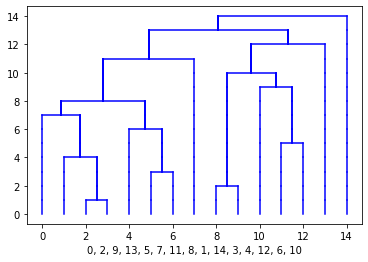

In [45]:
set_objs(15)
second_part()

2 clusters [[0, 8, 2, 7, 12, 11], [1, 3, 4, 6, 15, 9, 5, 13, 10, 14]]
3 clusters [[0, 8], [1, 3, 4, 6, 15, 9, 5, 13, 10, 14], [2, 7, 12, 11]]
5 clusters [[0, 8], [1, 3], [2, 7, 12, 11], [4, 6, 15, 9], [5, 13, 10, 14]]


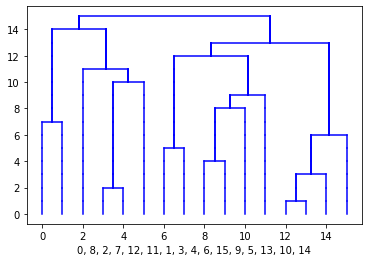

In [45]:
add_obj()
set_inf_obj(0)
second_part()